In [1]:
from tqdm import tqdm
from matplotlib import pyplot as plt
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

import os
import cv2
import numpy as np

import warnings
warnings.filterwarnings("ignore")

Using TensorFlow backend.


In [2]:
DATADIR = '../data/train'
CATEGORIES = ['Fire', 'NoFire']

In [3]:
IMG_SIZE = 32
def create_training_data():
    training_data = []
    for category in CATEGORIES:  
        path = os.path.join(DATADIR,category) 
        class_num = CATEGORIES.index(category)
        for img in tqdm(os.listdir(path)):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
    return training_data

In [4]:
training_data = create_training_data()

100%|██████████| 1301/1301 [00:23<00:00, 55.78it/s]


In [5]:
X = []
Y = []

for features,label in training_data:
    X.append(features)
    Y.append(label)

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
X = X/255.0

X.shape[1:]

(32, 32, 3)

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, Y, test_size=0.3)

In [7]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
train_datagen.fit(X_train)

val_datagen = ImageDataGenerator(
    rotation_range=15,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)
val_datagen.fit(X_val)

In [8]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', input_shape=X.shape[1:]))
model.add(AveragePooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
model.add(AveragePooling2D())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(units=256, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=2, activation = 'softmax'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

W1217 23:44:42.710166 140003520735040 deprecation.py:506] From /home/hssahrul/miniconda3/envs/ML/lib/python3.7/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [9]:
history = model.fit_generator(
    train_datagen.flow(X_train, y_train, batch_size=32), 
    validation_data=val_datagen.flow(X_val, y_val, batch_size=32), 
    epochs=100, 
    verbose=1
)

Epoch 1/100
53/53 [==============================] - 5s 103ms/step - loss: 0.6170 - acc: 0.6415 - val_loss: 0.5566 - val_acc: 0.7442
Epoch 2/100
53/53 [==============================] - 3s 61ms/step - loss: 0.5934 - acc: 0.7005 - val_loss: 0.5380 - val_acc: 0.7387
Epoch 3/100
53/53 [==============================] - 3s 64ms/step - loss: 0.5610 - acc: 0.7235 - val_loss: 0.5306 - val_acc: 0.7318
Epoch 4/100
53/53 [==============================] - 4s 67ms/step - loss: 0.5421 - acc: 0.7394 - val_loss: 0.4918 - val_acc: 0.7689
Epoch 5/100
53/53 [==============================] - 3s 63ms/step - loss: 0.5432 - acc: 0.7294 - val_loss: 0.4901 - val_acc: 0.7772
Epoch 6/100
53/53 [==============================] - 3s 62ms/step - loss: 0.5332 - acc: 0.7524 - val_loss: 0.4892 - val_acc: 0.7923
Epoch 7/100
53/53 [==============================] - 3s 66ms/step - loss: 0.5105 - acc: 0.7524 - val_loss: 0.4725 - val_acc: 0.7882
Epoch 8/100
53/53 [==============================] - 4s 76ms/step - loss: 0

In [10]:
model_name = 'Fire-32x32-CNN-v2'
model.save(f'../models/{model_name}.h5')

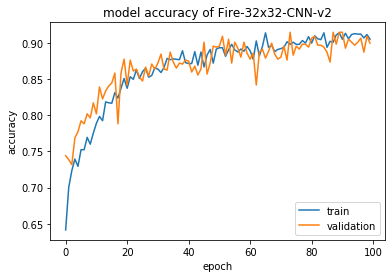

In [11]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title(f'model accuracy of {model_name}')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(f'{model_name}-accuracy')
plt.show()

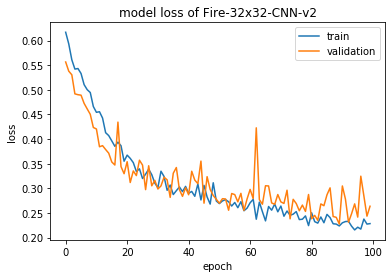

In [12]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title(f'model loss of {model_name}')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'])
plt.savefig(f'{model_name}-loss')
plt.show()